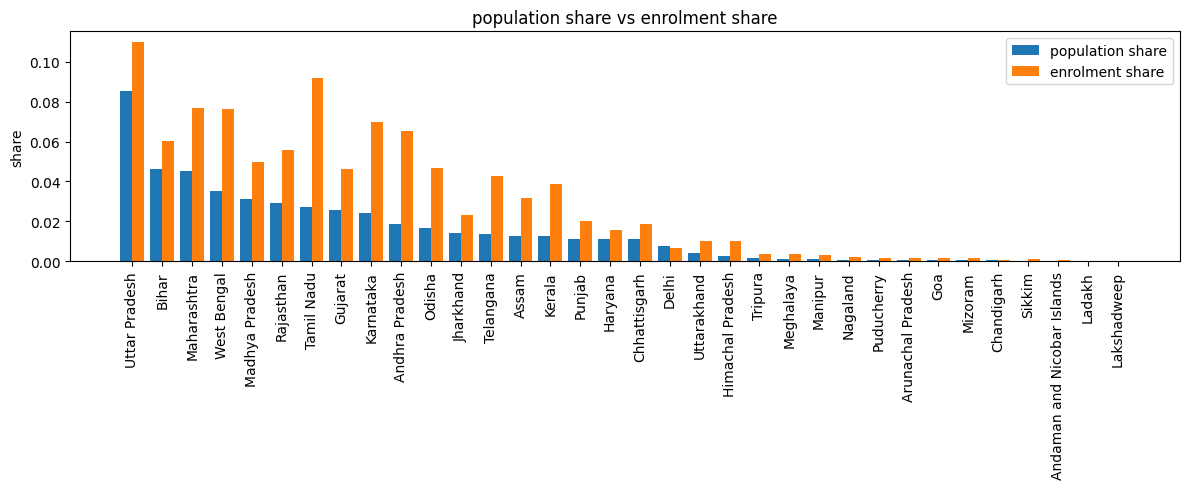

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
enrolments=enrolment_df.groupby("state").size().reset_index(name="enrolments")
enrolments["enrolment_share"]=enrolments["enrolments"]/enrolments["enrolments"].sum()

population=pd.read_csv("../sql/data/Population of Indian states 2025.csv")
population=population.rename(columns={
    "State/UT":"state",
    "Population 2025":"population"
})
population["population"]=population["population"].astype(str).str.replace(",","").astype(int)
population["population_share"]=population["population"]/population["population"].sum()

df=enrolments.merge(
    population[["state","population_share"]],
    on="state",
    how="inner"
).sort_values("population_share",ascending=False)

x=np.arange(len(df))
width=0.4

plt.figure(figsize=(12,5))
plt.bar(x-width/2,df["population_share"],width,label="population share")
plt.bar(x+width/2,df["enrolment_share"],width,label="enrolment share")
plt.xticks(x,df["state"],rotation=90)
plt.ylabel("share")
plt.title("population share vs enrolment share")
plt.legend()
plt.tight_layout()
plt.show()
